# 概率分布

**概率分布**（Probability Distribution）描述随机变量在各个可能取值上的概率分布情况，是统计学中的核心概念。根据变量的类型，概率分布可以分为以下几类：

1. **概率质量函数（PMF）**：
   - **用于**：离散随机变量
   - **定义**：每个可能取值的概率，如 $ P(X = x) $。

2. **概率密度函数（PDF）**：
   - **用于**：连续随机变量
   - **定义**：每个可能取值的概率密度，概率是该密度在某区间上的积分。

3. **累积分布函数（CDF）**：
   - **用于**：所有类型的随机变量
   - **定义**：随机变量小于或等于某特定值的概率，如 $ F(x) = P(X \leq x) $。

4. **逆累积分布函数（ICDF）**：
   - **定义**：给定一个概率值，返回相应的随机变量取值，表示CDF的反向操作。

这些函数共同用于描述和分析随机现象中的不确定性。


## 概率密度函数 - Probability Density Function

**概率密度函数 $ f(x) $ 在某个点 $ x $ 的值表示随机变量在该点附近出现的可能性密度。**

具体来说：

- $ f(x) $ 的值越大，表示随机变量在 $ x $ 附近出现的可能性越高。
- $ f(x) $ 的值越小，表示随机变量在 $ x $ 附近出现的可能性越低。

注意，$ f(x) $ 本身不是概率，而是概率密度。要找到一个范围内的实际概率，需要计算这个范围内 $ f(x) $ 的积分。

下面我们通过 sns 的 tips 数据集来理解 PDF 的概念

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

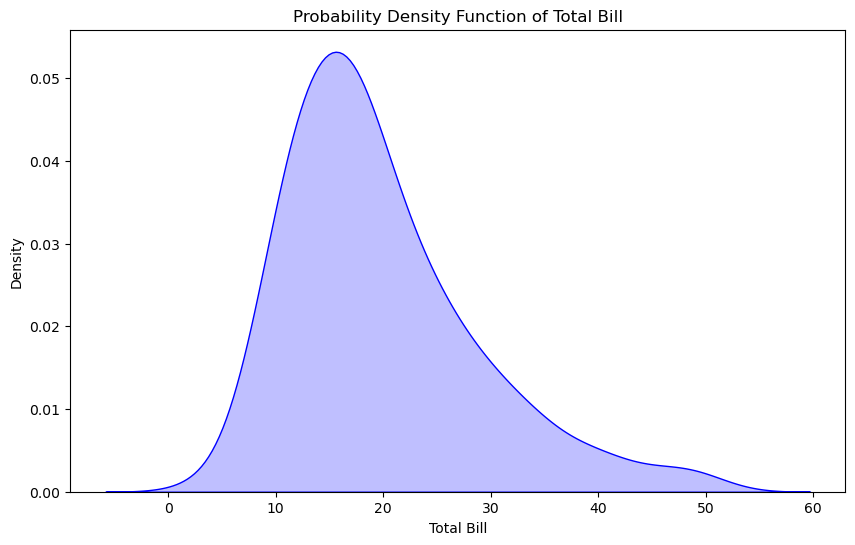

In [5]:
tips = pd.read_csv("../../data/tips.csv")

plt.figure(figsize=(10, 6))
sns.kdeplot(tips["total_bill"], fill=True, color="blue")
plt.title("Probability Density Function of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.show()

**解释**

1. **横轴（x轴）**：表示总账单金额（total_bill）。
2. **纵轴（y轴）**：表示概率密度（density）。

在图中，某一点的纵轴值表示账单金额在该点附近的出现频率密度。例如，如果在某个账单金额值处概率密度较高，这意味着在这个金额附近出现的账单次数较多。

**更具体的解释**

- **高峰**：图中的高峰（如总账单金额在10到20之间的部分）表示大多数账单金额集中在这个范围内。这意味着，在该金额范围内，账单金额出现的频率较高。
- **尾部**：图中的尾部表示账单金额非常大或非常小的情况，这些情况较少出现。
- **概率密度**：注意，纵轴上的值不是直接的概率，而是概率密度。要计算某个具体区间内的概率，需要计算该区间下曲线的面积。

**总结**

通过这个示例，我们可以看到概率密度函数如何帮助我们理解一个连续变量的分布情况。总账单金额的概率密度函数告诉我们账单金额在不同值附近出现的可能性密度，使我们能够直观地看到数据的集中趋势和分布特点。

计算 `total_bill` 在10到20之间的概率，我们需要计算该区间下概率密度函数（PDF）的积分。我们可以使用SciPy库中的 `quad` 函数进行积分计算。以下是具体步骤：

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.integrate import quad

In [8]:
tips = pd.read_csv("../../data/tips.csv")

# 计算 total_bill 的概率密度函数
kde = gaussian_kde(tips["total_bill"])

# 定义 PDF 函数
pdf = kde.pdf

# 计算概率 [10, 20]
probability, _ = quad(pdf, 10, 20)

print(f"Probability of total_bill being between 10 and 20: {probability:.4f}")

Probability of total_bill being between 10 and 20: 0.4789


`quad` 全称 "quadrature", 中文是 "求积" 的意思, 在这里用于执行一维数值积分, 即在给定区间上计算函数曲线下的面积, 也就是计算定积分.

## 累计分布函数 - Cumulative Distribution Function

累积分布函数 (Cumulative Distribution Function, CDF) 是概率统计中的一个重要概念，用来描述一个随机变量取值的累计概率。

### CDF 概念解释：

CDF 是一个函数，表示随机变量 $ X $ 小于或等于某个值 $ x $ 的概率。它定义如下：

$$ F(x) = P(X \leq x) $$

其中：
- $ F(x) $ 是 CDF 值，表示 $ X $ 小于或等于 $ x $ 的概率。
- $ X $ 是随机变量。
- $ x $ 是取值。

### 直观理解：
- CDF 是 PDF (概率密度函数) 的积分。
- CDF 从 0 增加到 1，当 $ x $ 从负无穷大增加到正无穷大时。
- 对于给定的 $ x $，CDF 表示随机变量 $ X $ 取值小于或等于 $ x $ 的累计概率。

### 在 `tips` 数据集上的应用：

使用 `sns` 和 `numpy`，我们可以计算并绘制 `total_bill` 列的 CDF。以下是具体的代码示例：


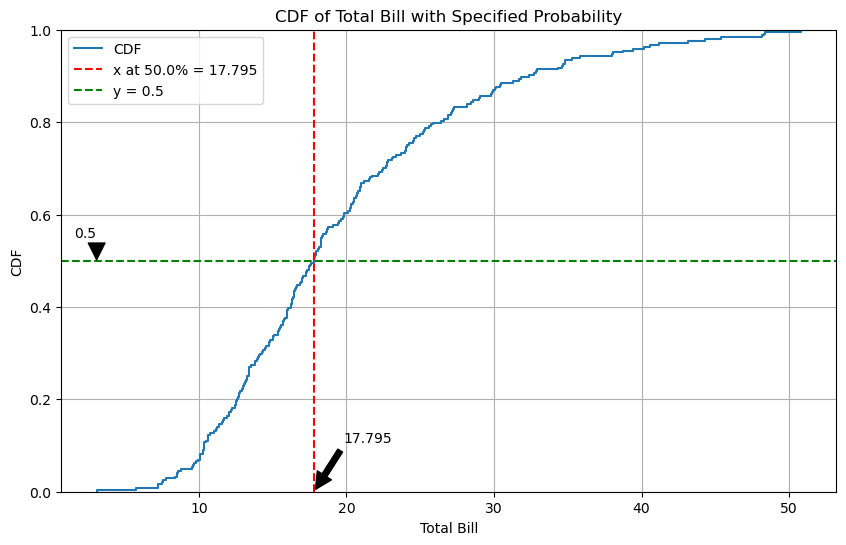

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 加载 tips 数据集
tips = pd.read_csv("../../data/tips.csv")

# 选择 total_bill 列
data = tips["total_bill"]

# 指定概率
probability = 0.5

# 计算指定概率下的值
value_at_prob = np.percentile(data, probability * 100)

# 计算ECDF
sorted_data = np.sort(data)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# 绘制 ECDF 使用 sns.ecdfplot
plt.figure(figsize=(10, 6))
sns.ecdfplot(data, label="CDF")

# 标注指定概率下的值
plt.axvline(
    x=value_at_prob,
    color="r",
    linestyle="--",
    label=f"x at {probability*100}% = {value_at_prob}",
)
plt.axhline(y=probability, color="g", linestyle="--", label=f"y = {probability}")

# 在 y 轴上标注指定概率
plt.annotate(
    f"{probability}",
    xy=(min(data), probability),
    xytext=(min(data), probability + 0.05),
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="right",
)

# 在 x 轴上标注指定概率对应的值
plt.annotate(
    f"{value_at_prob}",
    xy=(value_at_prob, 0),
    xytext=(value_at_prob + 2, 0.1),
    arrowprops=dict(facecolor="black", shrink=0.05),
    verticalalignment="bottom",
)

plt.title("CDF of Total Bill with Specified Probability")
plt.xlabel("Total Bill")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

### 解释：
1. **数据排序**：将 `total_bill` 列的数据按从小到大排序。
2. **计算 CDF**：使用 `np.arange` 生成 1 到样本数量的数组，并除以样本数量，得到每个值的累计概率。
3. **绘制 CDF**：使用 `matplotlib` 绘制 CDF 曲线。

通过上述步骤，我们可以直观地看到 `total_bill` 列的累积分布函数，从而了解其取值范围及其累计概率。

CDF 的图形展示了 `total_bill` 的分布情况，例如，可以看到某个账单金额的累积概率，进而推断账单金额在某个范围内的概率。通过这种方式，CDF 可以帮助我们更好地理解数据的分布特征。

> ECDF (Empirical Cumulative Distribution Function) 是一种概率分布函数，用于描述数据的分布情况。它是通过计算数据的累计频率来表示数据的分布。

累计函数告诉我们, `total_bill` 的中位数 (概率=0.5) 是 17.795.


### 分析 `total_bill` 的分布

#### 1. 直方图 (Histogram)

使用直方图可以直观地看到数据的频率分布。

#### 2. 核密度预估 (Kernel Density Estimation, KDE)

使用密度图可以平滑地显示数据的分布。

#### 3. Q-Q 图 (Quantile-Quantile Plot)

Q-Q 图可以用来比较 total_bill 数据的分布与正态分布的关系。

> quantile, 分位数

#### 4. 描述性统计 (Descriptive Statistics)

通过描述性统计量（如均值、标准差、偏度、峰度等）可以进一步理解数据的分布特征。

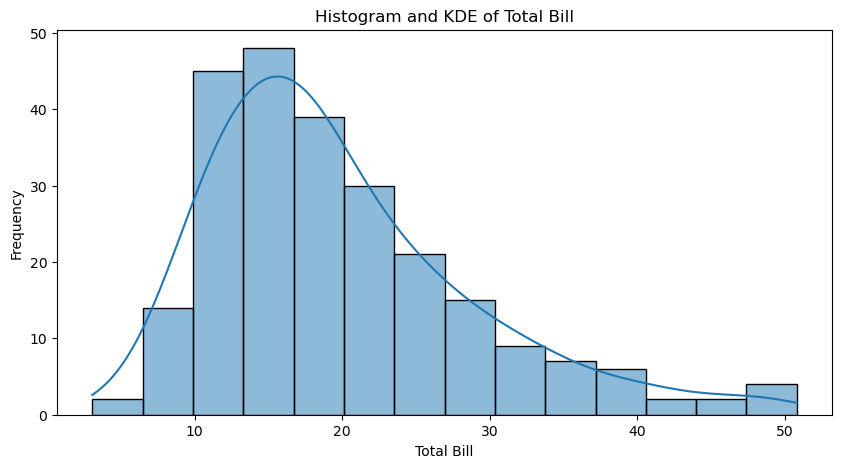

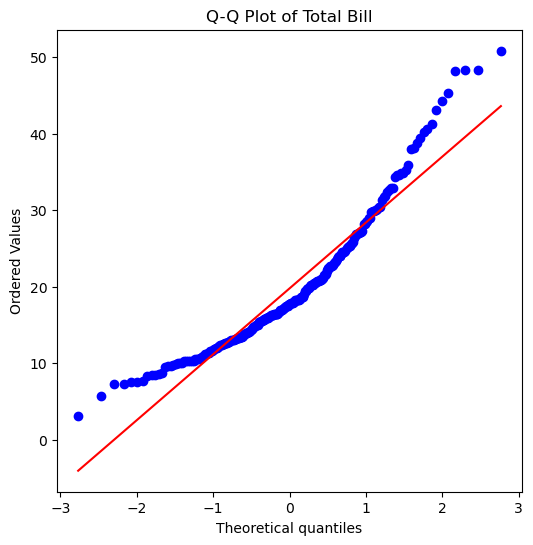

描述性统计:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64
偏度 (Skewness): 1.1262346334818638
峰度 (Kurtosis): 1.1691681323851366


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# 加载数据集
tips = pd.read_csv("../../data/tips.csv")

# 直方图
plt.figure(figsize=(10, 5))
sns.histplot(tips["total_bill"], kde=True)
plt.title("Histogram and KDE of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

# Q-Q 图
plt.figure(figsize=(6, 6))
stats.probplot(tips["total_bill"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Total Bill")
plt.show()

# 描述性统计
desc_stats = tips["total_bill"].describe()
skewness = stats.skew(tips["total_bill"])
kurtosis = stats.kurtosis(tips["total_bill"])

print("描述性统计:")
print(desc_stats)
print(f"偏度 (Skewness): {skewness}")
print(f"峰度 (Kurtosis): {kurtosis}")

#### 分析结果
1. **直方图和 KDE 图**:
   - 通过直方图和 KDE 图，我们可以看到 `total_bill` 的数据大致呈现右偏分布，即大部分账单金额集中在较低的范围，较高的账单金额相对较少。

2. **Q-Q 图**:
   - Q-Q 图显示 `total_bill` 的分布与正态分布的比较。如果数据点大致沿着对角线分布，说明数据接近正态分布。否则，说明数据偏离正态分布。从图中我们可以看到数据点在右侧偏离了对角线，这进一步证明了数据的右偏特性。

3. **描述性统计**:
   - 描述性统计量提供了 `total_bill` 数据的基本特征，例如均值、中位数、最小值、最大值等。
   - 偏度 (Skewness) 和 峰度 (Kurtosis)：
     - 偏度的正值说明数据右偏，负值说明数据左偏。偏度值越大，说明数据偏斜越严重。
     - 峰度表示数据分布的陡峭程度。正值峰度说明数据比正态分布更尖峰，负值峰度说明数据比正态分布更平坦。

#### 总结
通过以上分析，我们可以得出 `tips` 数据集中的 `total_bill` 列数据大致呈现右偏分布。这意味着大多数账单金额集中在较低的范围内，而较高的账单金额较少出现。

### 正态分布下的 CDF

正态分布，也称为高斯分布，是一种连续概率分布，广泛用于统计学和自然科学。正态分布的概率密度函数 (PDF) 由以下公式定义：

$$ f(x|\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) $$

其中：
- $ \mu $ 是均值。
- $ \sigma $ 是标准差。

#### 累积分布函数 (CDF)

正态分布的累积分布函数 (CDF) 用于表示随机变量 $ X $ 小于或等于某个值 $ x $ 的概率。对于正态分布，CDF 通常用符号 $ \Phi(x) $ 表示，其公式为：

$$ \Phi(x|\mu,\sigma) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(t-\mu)^2}{2\sigma^2}\right) dt $$

由于该积分没有解析解，实际计算中通常使用数值方法或查表法。

#### 使用 SciPy 计算正态分布的 CDF

我们可以使用 Python 的 SciPy 库来计算正态分布的 CDF。SciPy 提供了 `scipy.stats.norm` 类，可以方便地计算给定均值和标准差的正态分布的 CDF。

#### 示例代码

以下是如何使用 SciPy 计算给定均值和标准差下正态分布的 CDF：


In [21]:
import numpy as np
from scipy.stats import norm
import pandas as pd

penguins = pd.read_csv("../../data/penguins.csv")

data = penguins["body_mass_g"]

# 均值
mu = data.mean()
# 标准差
sigma = data.std()

# 计算某个特定值的 CDF，例如 x = 4800
x = 4800
cdf_value = norm.cdf(x, mu, sigma)

print(f"CDF at x = {x} for N({mu:.2f}, {sigma:.2f}) is {cdf_value:.2f}")

CDF at x = 4800 for N(4201.75, 801.95) is 0.77



#### 解释

1. **均值 ($\mu$) 和标准差 ($\sigma$)**：
   - 假设企鹅体重的均值为 4201.75 克，标准差为 801.95 克。
   
2. **计算 CDF**：
   - 使用 `norm.cdf(x, mu, sigma)` 计算在 $ x = 4800 $ 时的 CDF 值，即企鹅体重小于或等于4800克的概率。

#### 结果解释

假设均值为 4201.75 克，标准差为 801.95 克的正态分布，计算 $ x = 4800 $ 时的 CDF 值。输出的 `cdf_value` 是 $ \Phi(4800|4201.75,801.95) $ 的值，即企鹅体重小于或等于4800克的概率。例如，如果 `cdf_value = 0.77`，表示大约77%的企鹅体重大约小于或等于4800克。

#### 总结

通过理解正态分布的累积分布函数 (CDF)，我们可以计算并解释随机变量在特定值以下的概率。在实际应用中，SciPy 提供了方便的工具来计算这些值，使我们能够快速进行统计分析。

## 逆累计分布函数 - Inverse Cumulative Distribution Function

逆累积分布函数 (Inverse Cumulative Distribution Function, 也称为分位数函数或 Quantile Function) 是累积分布函数 (CDF) 的反函数。对于给定的累积概率 $ p $，逆累积分布函数返回随机变量 $ X $ 的值，使得 $ P(X \leq x) = p $。

### 正态分布的逆累积分布函数

对于正态分布，逆累积分布函数常用符号 $ \Phi^{-1}(p) $ 表示。SciPy 提供了计算正态分布逆累积分布函数的工具 `scipy.stats.norm.ppf`，可以方便地计算给定累积概率下的随机变量值。

> 在 scipy.stats.norm.ppf 中，ppf 是 "Percent Point Function" 的缩写，也被称为分位点函数或逆累积分布函数（Inverse Cumulative Distribution Function, 简称逆CDF）。

### 示例代码

以下是一个具体的示例，展示如何使用 SciPy 计算正态分布的逆累积分布函数，并绘制相应的图表。


Mean (mu): 4201.754385964912
Standard Deviation (sigma): 800.7812292384519


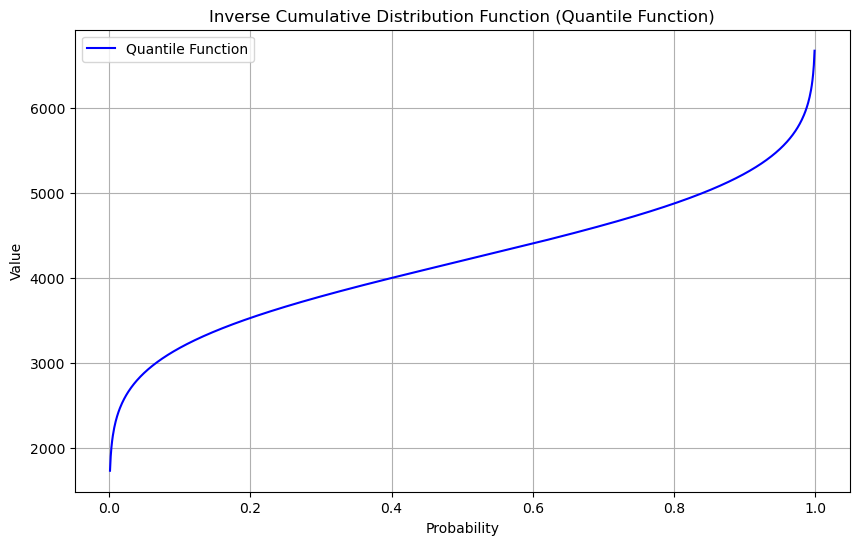

The 25th percentile (p=0.25) is: 3661.6356546941574
The 50th percentile (p=0.5) is: 4201.754385964912
The 75th percentile (p=0.75) is: 4741.8731172356665


In [25]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# 加载 penguins 数据集
penguins = pd.read_csv("../../data/penguins.csv")

# 选择 body_mass_g 列并删除缺失值
data = penguins["body_mass_g"].dropna()

# 计算均值和标准差
mu = np.mean(data)
sigma = np.std(data)

print(f"Mean (mu): {mu}")
print(f"Standard Deviation (sigma): {sigma}")

# 生成概率值
p = np.linspace(0, 1, 1000)

# 计算正态分布的逆累积分布函数 (分位数函数)
quantile_values = norm.ppf(p, mu, sigma)

# 绘制分位数函数
plt.figure(figsize=(10, 6))
plt.plot(p, quantile_values, label="Quantile Function", color="blue")
plt.title("Inverse Cumulative Distribution Function (Quantile Function)")
plt.xlabel("Probability")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

# 示例：计算特定概率下的值
probabilities = [0.25, 0.5, 0.75]
quantiles = norm.ppf(probabilities, mu, sigma)

for prob, quantile in zip(probabilities, quantiles):
    print(f"The {int(prob*100)}th percentile (p={prob}) is: {quantile}")

### 结果解释

1. **分位数函数图**：
   - 图显示了正态分布的分位数函数，即给定累积概率 $ p $ 时的随机变量值。可以看到，对于不同的概率，随机变量的值如何变化。

2. **特定概率下的值**：
   - 代码计算并打印了25%、50%（中位数）和75%百分位数对应的随机变量值。这些值表示在给定累积概率下，随机变量取值的具体数值。

"The 25th percentile (p=0.25) is: 3661.6356546941574" 这句话说明了企鹅体重数据集中有25%的企鹅体重大约小于或等于 3661.64 克。换句话说，3661.64 克是这个数据集的第25百分位数 (25th percentile)。

### 百分位数解释

- **第25百分位数 (25th percentile)**：数据集中25%的值低于或等于这个数值。对于企鹅体重数据，这意味着有25%的企鹅体重在 3661.64 克或更轻。
- **第50百分位数 (50th percentile)**：即中位数，表示数据集中50%的值低于或等于这个数值。
- **第75百分位数 (75th percentile)**：数据集中75%的值低于或等于这个数值。

### 实际意义

1. **描述数据分布**：
   - 第25百分位数提供了关于数据分布的有价值信息，尤其是数据的较低部分。例如，在描述企鹅体重时，可以知道哪些企鹅体重处于较低的四分之一。
   
2. **识别异常值**：
   - 如果有企鹅体重明显低于 3661.64 克，可以认为它们是异常值或极端值。

3. **数据的分类**：
   - 百分位数可以用来将数据分成不同的部分，便于进一步分析。例如，可以将企鹅体重分为四个部分：第25百分位数以下、第25到第50百分位数之间、第50到第75百分位数之间以及第75百分位数以上。

通过这些示例和图表，我们可以理解逆累积分布函数的概念及其在正态分布中的应用。这对于理解数据的分布特性和进行统计推断非常有用。

## 概率质量函数 - Probability Mass Function